In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, KMeans
from sklearn.neighbors import KNeighborsClassifier

In [6]:
import sys
from pathlib import Path

# Get the current notebook's directory
parent = Path().resolve()  # Current working directory (notebook's directory)
root = parent.parent.parent       # Go one level up

print("Current Directory:", parent)
print("Parent Directory:", root)

# Optionally append to sys.path
sys.path.append(str(root))

Current Directory: C:\Users\Jake\Learning-Dynamic-Systems\search
Parent Directory: C:\Users\Jake


In [7]:
def test():
    p_success = 0.6
    return np.random.random() > 1 - p_success

def generate_possibilities_2d(min, max, num_points):
    nx = np.linspace(min, max, num_points)
    ny = np.linspace(min, max, num_points)
    return np.meshgrid(nx, ny)

def get_random_coordinate(n_points: int, n_dimensions: int=2):
    x = np.random.randint(0, n_points)
    y = np.random.randint(0, n_points)

    return x, y

def get_next_coordinate():
    """
    ----
    Available hyperparameters:
    - Max clusters
    - Radius proportion
    - Chance of point inside radius
    """
    return np.random.random()

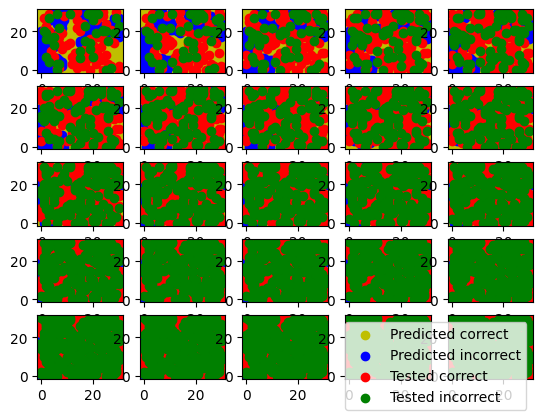

Predicting remaining datapoints


In [8]:
NUM_POINTS = 31 # Number of values tested for each parameter
INITIALISATION_SIZE = 100
EPOCH_SIZE = 25 # Number of points to test before reclassifying predictions
NUM_EPOCHS = 25

CHANCE_TEST_EXPECTED_POSITIVE = 0.8 # The chance to choose a grid position in our expected SPS confidence region

plot_data = {}

# Grid is made up of NUM_POINTS x NUMPOINTS array
# output[x][y]

xv, yv = generate_possibilities_2d(-1, 1, NUM_POINTS)

# Build list of possible coordinates
remaining_coords = set()
for x in range(NUM_POINTS):
    coords= [(x, y) for y in np.arange(NUM_POINTS)]
    for coord in coords:
        remaining_coords.add(coord)


results = -1 * np.ones( (NUM_POINTS, NUM_POINTS) )
output = []

for n_epoch in range(0, NUM_EPOCHS):

    if n_epoch == 0:
        for i in range(INITIALISATION_SIZE):
            x, y = get_random_coordinate(NUM_POINTS)
            while results[x,y] != -1:
                x, y = get_random_coordinate(NUM_POINTS)
            coord = (x,y)

            results[coord] = test()
            remaining_coords.remove(coord)
            output.append([x, y, results[coord]])
    else:
        # Re-test these points
        for i in range(EPOCH_SIZE):
            is_test_confidence_region = np.random.random() < CHANCE_TEST_EXPECTED_POSITIVE
            is_coord_untested = False
            while not is_coord_untested:
                if is_test_confidence_region and len(pred_success) > 0:
                    # Test random point from expected confidence region

                    index = np.random.randint(0, len(pred_success) - 1) if len(pred_success) > 1 else 0
                    coord = pred_success[index][:2]
                    if index == 0:
                        pred_success = pred_success[1:]
                    else:
                        pred_success = np.concatenate([pred_success[:index-1], pred_success[index:]])
                elif len(pred_fail) > 0:
                    # Test random point from outside expected confidence region
                    index = np.random.randint(0, len(pred_fail) - 1) if len(pred_fail) > 1 else 0
                    coord = pred_fail[index][:2]
                    if index == 0:
                        pred_fail = pred_fail[1:]
                    else:
                        pred_fail = np.concatenate([pred_fail[:index-1], pred_fail[index:]])

                else:
                    print("Run out of points to test! Stopping")
                    break

                coord = tuple(coord.astype(int))
                x = coord[0]
                y = coord[1]
                is_coord_untested = coord in remaining_coords

            results[coord] = test()
            remaining_coords.remove(coord)
            output.append([x, y, results[coord]])

    X = np.array(output)[:, 0:2]
    y = np.array(output)[:, 2]

    knn = KNeighborsClassifier(n_neighbors=7, weights="distance")
    knn.fit(X, y)

    X_test = np.array([list(x) for x in list(remaining_coords)])
    y_pred = knn.predict(X_test)

    # Concatenate the results
    concat = np.concatenate([X_test, np.array([y_pred]).transpose()], axis=1)
    pred_success = concat[np.where(concat[:,2] == 1)]
    pred_fail = concat[np.where(concat[:,2] == 0)]

    correct = np.where([results == 1])
    correct_x = correct[1]
    correct_y = correct[2]

    incorrect = np.where([results == 0])
    incorrect_x = incorrect[1]
    incorrect_y = incorrect[2]

    correct = np.where([results == 1])
    correct_x = correct[1]
    correct_y = correct[2]

    incorrect = np.where([results == 0])
    incorrect_x = incorrect[1]
    incorrect_y = incorrect[2]

    plot_data["correct_x_%d" % n_epoch] = correct_x.copy()
    plot_data["correct_y_%d" % n_epoch] = correct_y.copy()
    plot_data["incorrect_x_%d" % n_epoch] = incorrect_x.copy()
    plot_data["incorrect_y_%d" % n_epoch] = incorrect_y.copy()
    plot_data["pred_success_x_%d" % n_epoch] = pred_success[:,0].copy()
    plot_data["pred_success_y_%d" % n_epoch] = pred_success[:,1].copy()
    plot_data["pred_fail_x_%d" % n_epoch] = pred_fail[:,0].copy()
    plot_data["pred_fail_y_%d" % n_epoch] = pred_fail[:,1].copy()

plt.figure()
for n_epoch in range(NUM_EPOCHS):
# Plot the initialised grid
    plt.subplot(5, 5, n_epoch+1)

    plt.scatter(plot_data["pred_success_x_%d" % n_epoch],   plot_data["pred_success_y_%d" % n_epoch], color='y')
    plt.scatter(plot_data["pred_fail_x_%d" % n_epoch],      plot_data["pred_fail_y_%d" % n_epoch], color='b')
    plt.scatter(plot_data["correct_x_%d" % n_epoch],        plot_data["correct_y_%d" % n_epoch], color='r')
    plt.scatter(plot_data["incorrect_x_%d" % n_epoch],      plot_data["incorrect_y_%d" % n_epoch], color='g')
plt.legend(['Predicted correct', 'Predicted incorrect', 'Tested correct', 'Tested incorrect'])
plt.show()
print("Predicting remaining datapoints")

# print(y_pred == 1)


In [9]:
# Plot data for one run of the KNN Search


{0.36084749113216996, 0.8381608102337008, 0.9159066495384792, 0.12157023359671837, 0.6343621221581164, 0.7372693661218126, 0.8266896026773757, 0.1722655745631284, 0.054815941290812464, 0.9898094757328115, 0.8427751696271885, 0.9696757164984026, 0.3420187884088436, 0.7354445866445636, 0.048756022139835986, 0.3049120063713231, 0.21535810365477048, 0.7909845224567198, 0.05004834854025331, 0.2710368312864325, 0.9075755043275219, 0.2148988518075492, 0.09764589672022395, 0.9406103629452703, 0.701481864429463, 0.9418060770136313, 0.5971655502214214, 0.8903857349505776, 0.9426078961017842, 0.9765543108347737, 0.6479942023771226, 0.24476674398922493, 0.1912428288750696, 0.974695333051465, 0.39405536209097114, 0.28468276862217834, 0.6125109635473088, 0.9023571853837522, 0.4347738978737832, 0.02152702479474744, 0.8225260971532125, 0.990928360061612, 0.7087510309936987, 0.9519639532746239, 0.41211291458995725, 0.9428599847840263, 0.8143859384379432, 0.4698765434915543, 0.4009334153718982, 0.498869

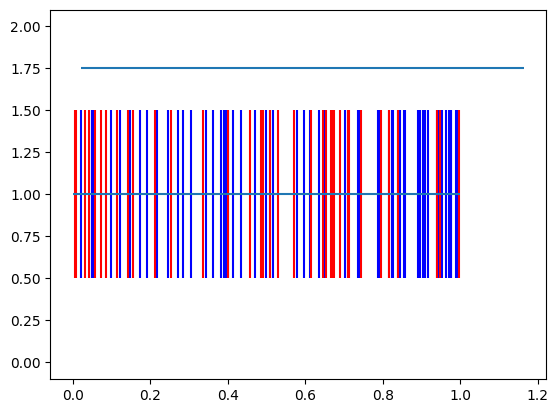

In [10]:
success_coords = set()
fail_coords = set()

for i in range(100):
    coordinate = get_next_coordinate()
    is_success = test()

    if is_success:
        success_coords.add(coordinate)
    else:
        fail_coords.add(coordinate)
print(success_coords)
print(fail_coords)

success_arr = np.array(list(success_coords))
radius = np.abs((success_arr - success_arr.mean())).max()

fail_arr = np.array(list(fail_coords))

print("Mean:", success_arr.mean())
print("Radius:", radius)

plt.figure()
plt.eventplot(success_arr, orientation='horizontal', colors='b')
plt.eventplot(fail_arr, orientation='horizontal', colors='r')
# plt.eventplot([success_arr.mean(), success_arr.mean()-radius, success_arr.mean()+radius], orientation='horizontal', colors='r')

plt.hlines(1,0,1)
plt.hlines(1.75,success_arr.mean()-radius, success_arr.mean()+radius)

plt.show()